In [96]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path
import random

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
%matplotlib inline

In [99]:
train_dir = Path('/content/drive/MyDrive/NUS Stats CV Workshop 2021/DSC/train_data/train_images').resolve()  #training image folder
sample_image = random.choice(list(train_dir.iterdir()))
image_dir = sample_image.as_posix()

In [100]:
image = cv2.imread(image_dir)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

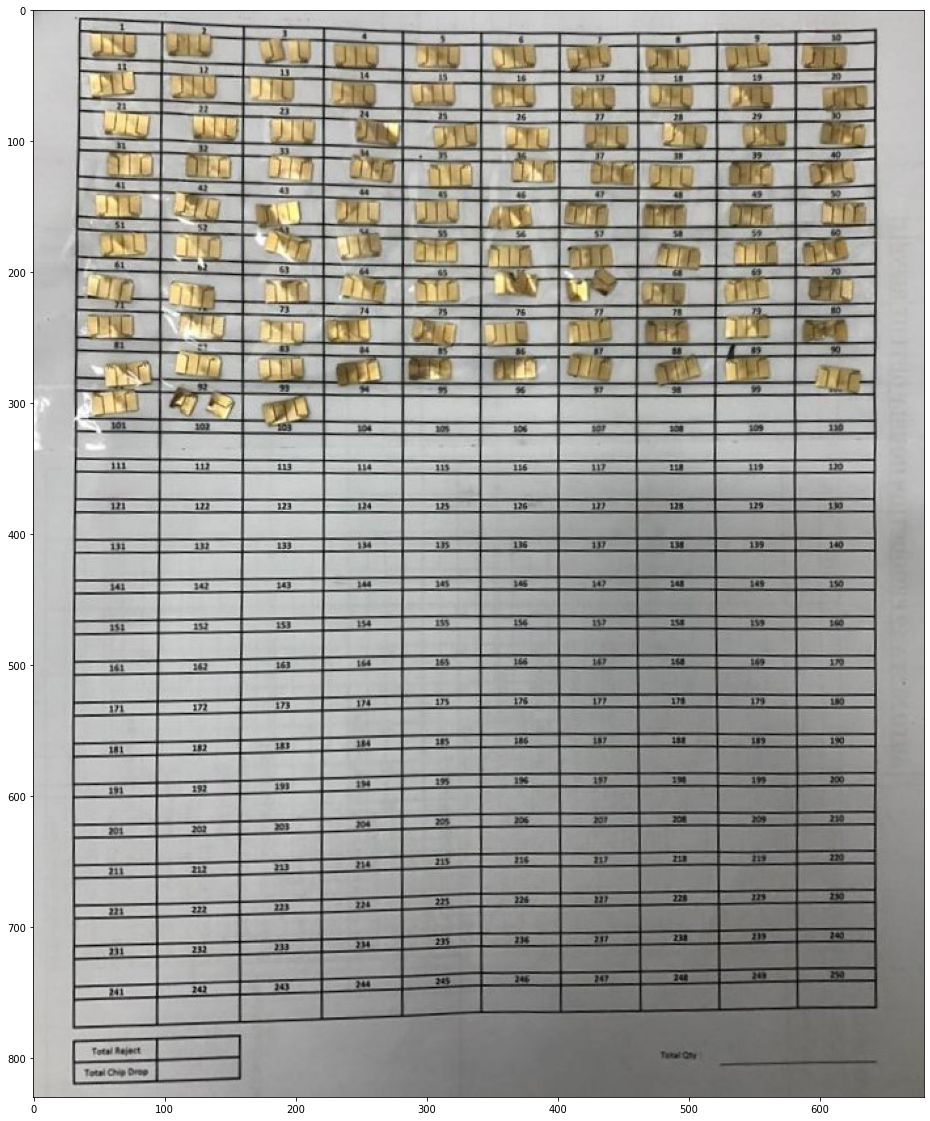

In [101]:
plt.figure(figsize = (20, 20))
plt.imshow(rgb_image);

In [102]:
new_image = cv2.convertScaleAbs(image, alpha = 1.0, beta = 30.)

In [103]:
bilateral_image = cv2.bilateralFilter(rgb_image, 9, 75, 75)

In [104]:
def plot_two_images(img1, img2, img1_gray = False, img2_gray = False):
    plt.figure(figsize = (20, 20))
    plt.subplot(121)
    if img1_gray:
        plt.imshow(img1, cmap = 'gray')
    else:
        plt.imshow(img1)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    if img2_gray:
        plt.imshow(img2, cmap = 'gray')
    else:
        plt.imshow(img2)
    plt.xticks([])
    plt.yticks([]);

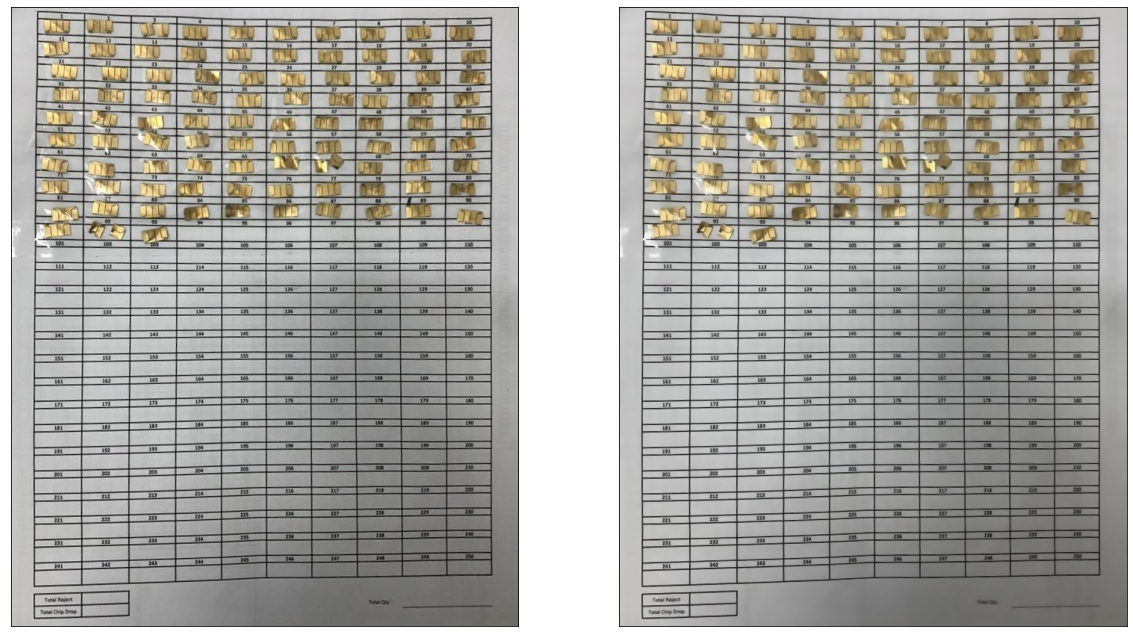

In [105]:
plot_two_images(rgb_image, bilateral_image)

In [106]:
hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
new_hsv_image = cv2.cvtColor(bilateral_image, cv2.COLOR_RGB2HSV)

In [107]:
new_mask = cv2.inRange(new_hsv_image, (10, 50, 50), (40, 255, 255))
mask = cv2.inRange(hsv_image, (10, 50, 50), (40, 255, 255))

In [108]:
result_1 = cv2.bitwise_and(rgb_image, rgb_image, mask = new_mask)
result_2 = cv2.bitwise_and(rgb_image, rgb_image, mask = mask)

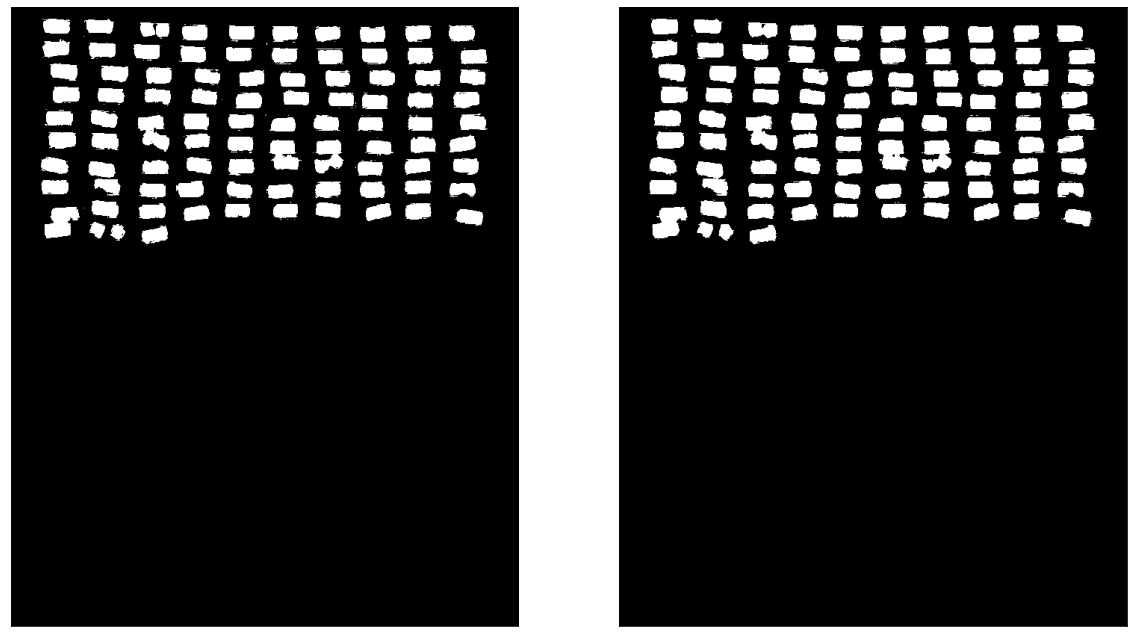

In [109]:
plot_two_images(mask, new_mask, True, True)

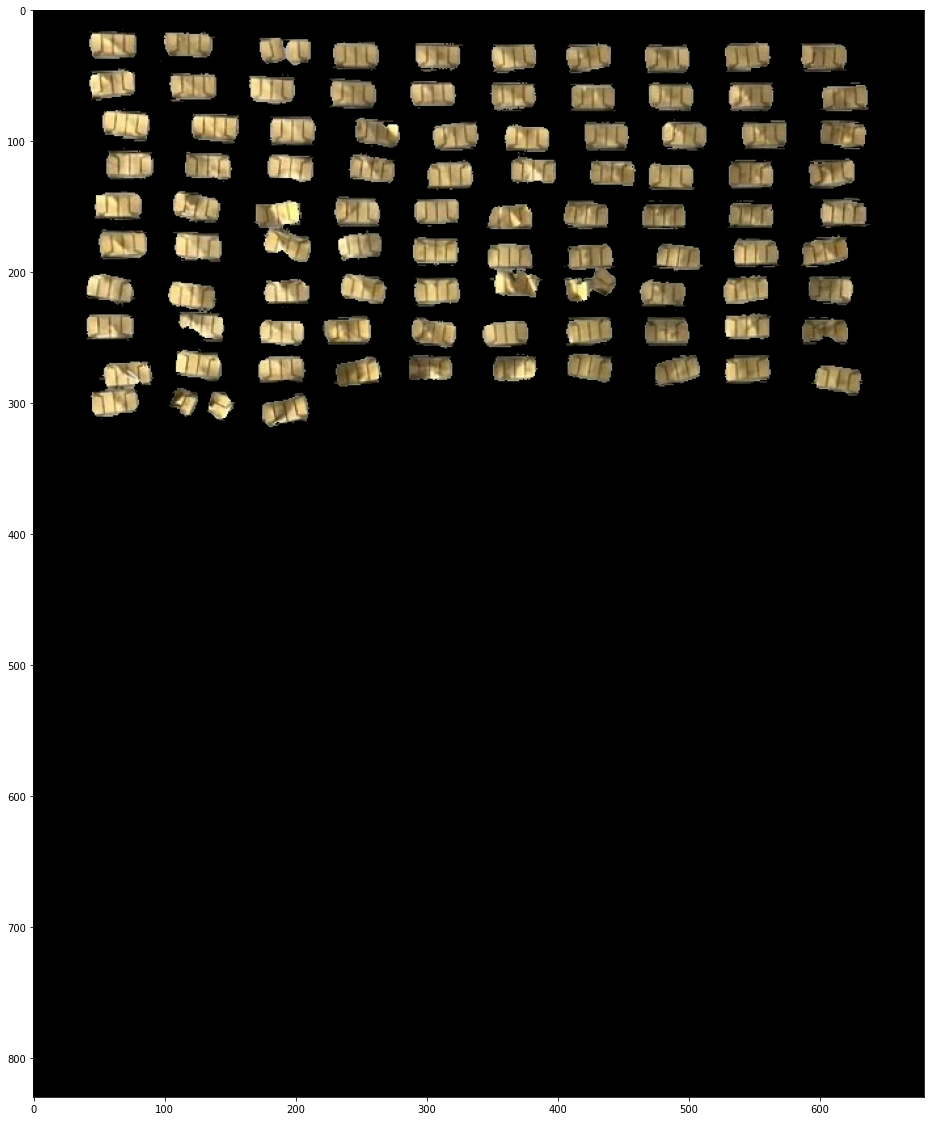

In [110]:
plt.figure(figsize = (20, 20))
plt.imshow(result_1);

In [111]:
grey_image = cv2.cvtColor(result_1, cv2.COLOR_RGB2GRAY)

In [112]:
edges = cv2.Canny(new_mask, 200, 255)

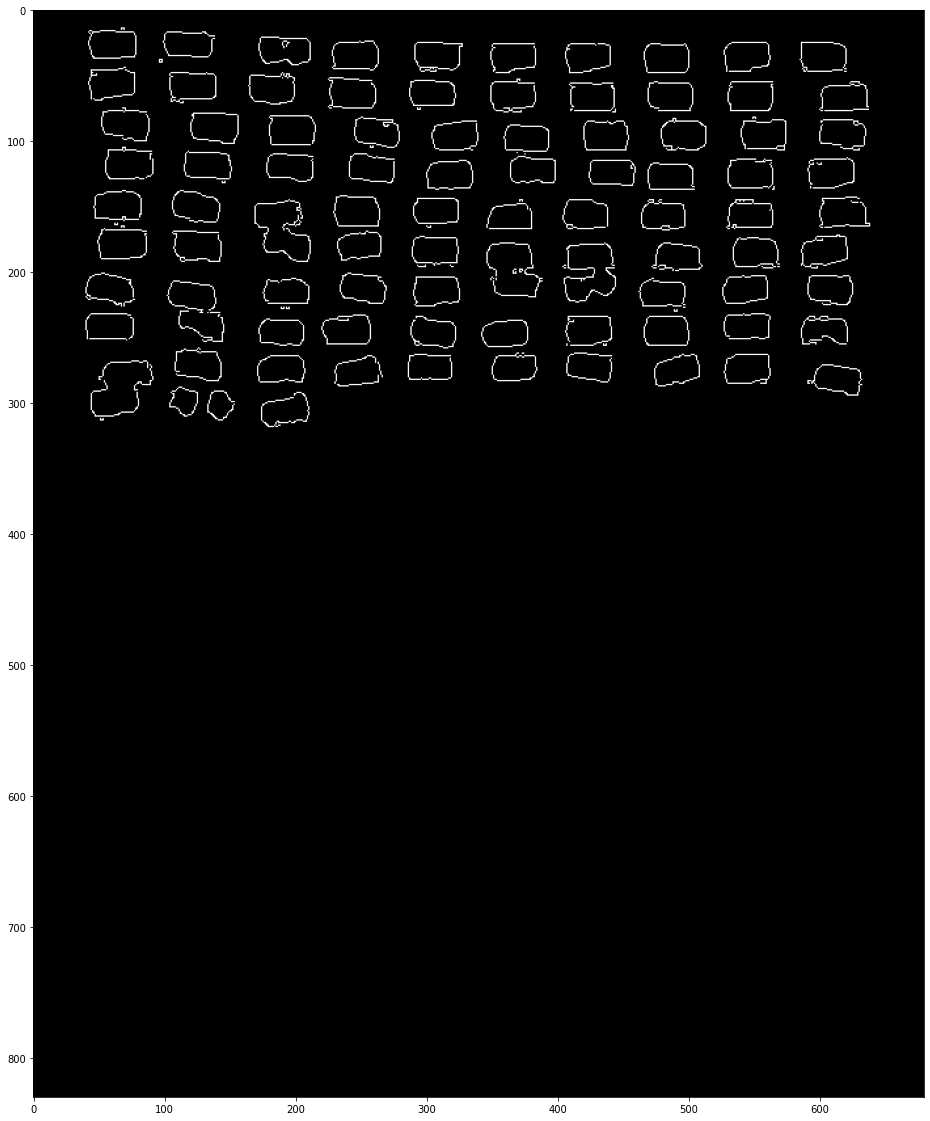

In [113]:
plt.figure(figsize = (20, 20))
plt.imshow(edges ,cmap = 'gray');

In [114]:
kernel = np.ones((3,3), np.uint8)

In [115]:
new_bilateral_hsv_image = cv2.cvtColor(bilateral_image, cv2.COLOR_RGB2HSV)

In [116]:
bil_mask = cv2.inRange(new_bilateral_hsv_image, (10, 35, 20), (30, 255, 255))

In [117]:
erosion = cv2.erode(new_mask, kernel, iterations = 1)
dilate = cv2.dilate(new_mask, kernel, iterations = 1)
adv_erode = cv2.morphologyEx(new_mask, cv2.MORPH_OPEN, kernel, iterations = 3)
hit_miss = cv2.morphologyEx(new_mask, cv2.MORPH_HITMISS, kernel)

In [118]:
bil_result = cv2.bitwise_and(rgb_image, rgb_image, mask = adv_erode)

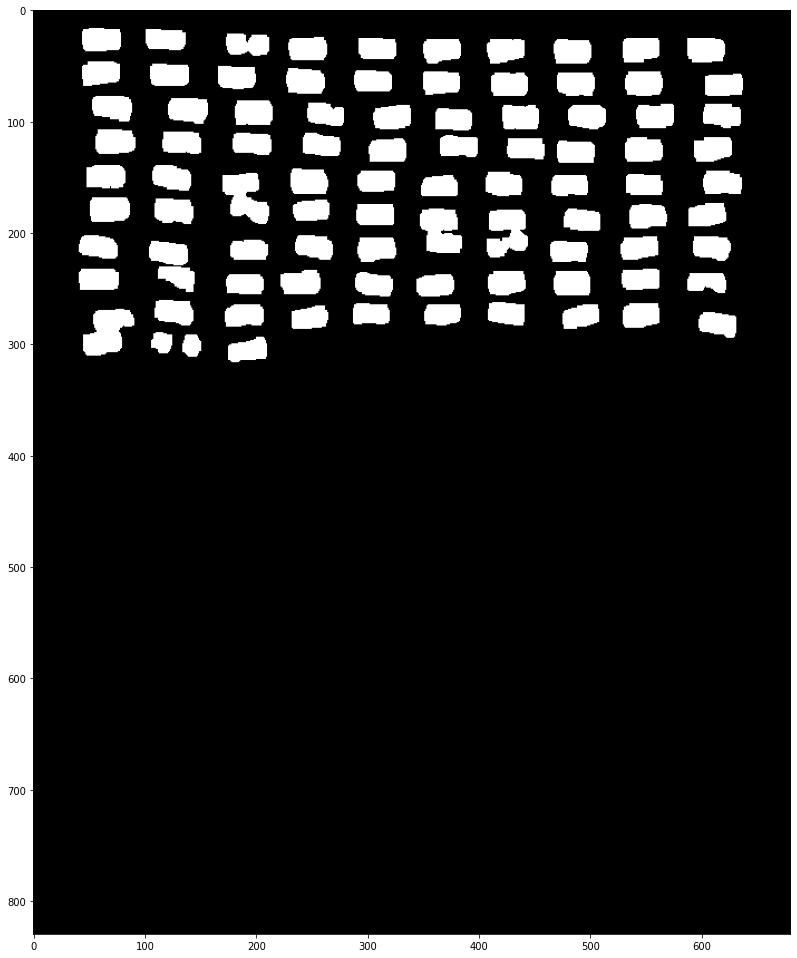

In [119]:
plt.figure(figsize = (17, 17))
plt.imshow(adv_erode, cmap = 'gray');

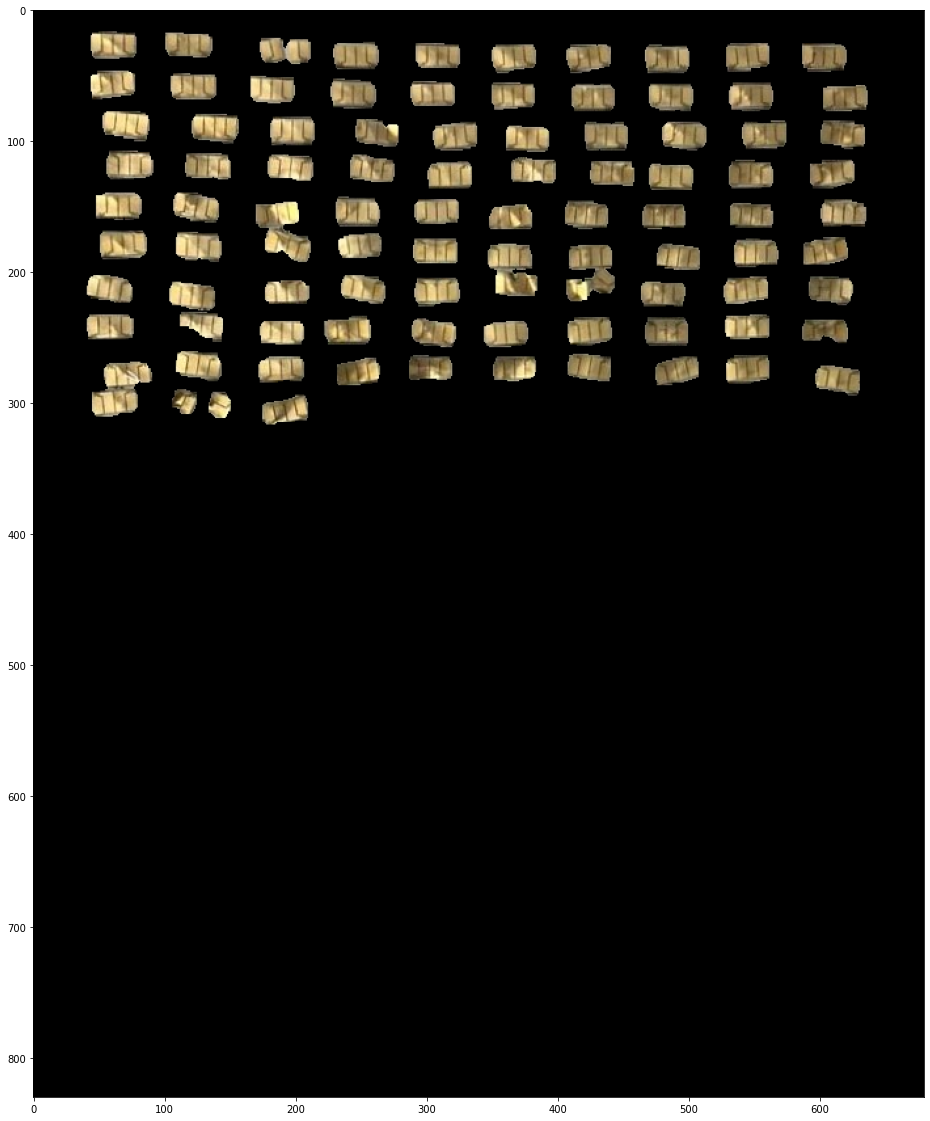

In [120]:
plt.figure(figsize = (20, 20))
plt.imshow(bil_result)

In [121]:
grey_image = cv2.cvtColor(bil_result, cv2.COLOR_RGB2GRAY)
grey_image = cv2.bilateralFilter(grey_image, 9, 75, 75)

In [122]:
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(grey_image, -1, kernelx)
img_prewitty = cv2.filter2D(grey_image, -1, kernely)

In [123]:
img_prewitt = img_prewittx + img_prewitty

In [124]:
bil_edges = cv2.Canny(grey_image, 200, 255)

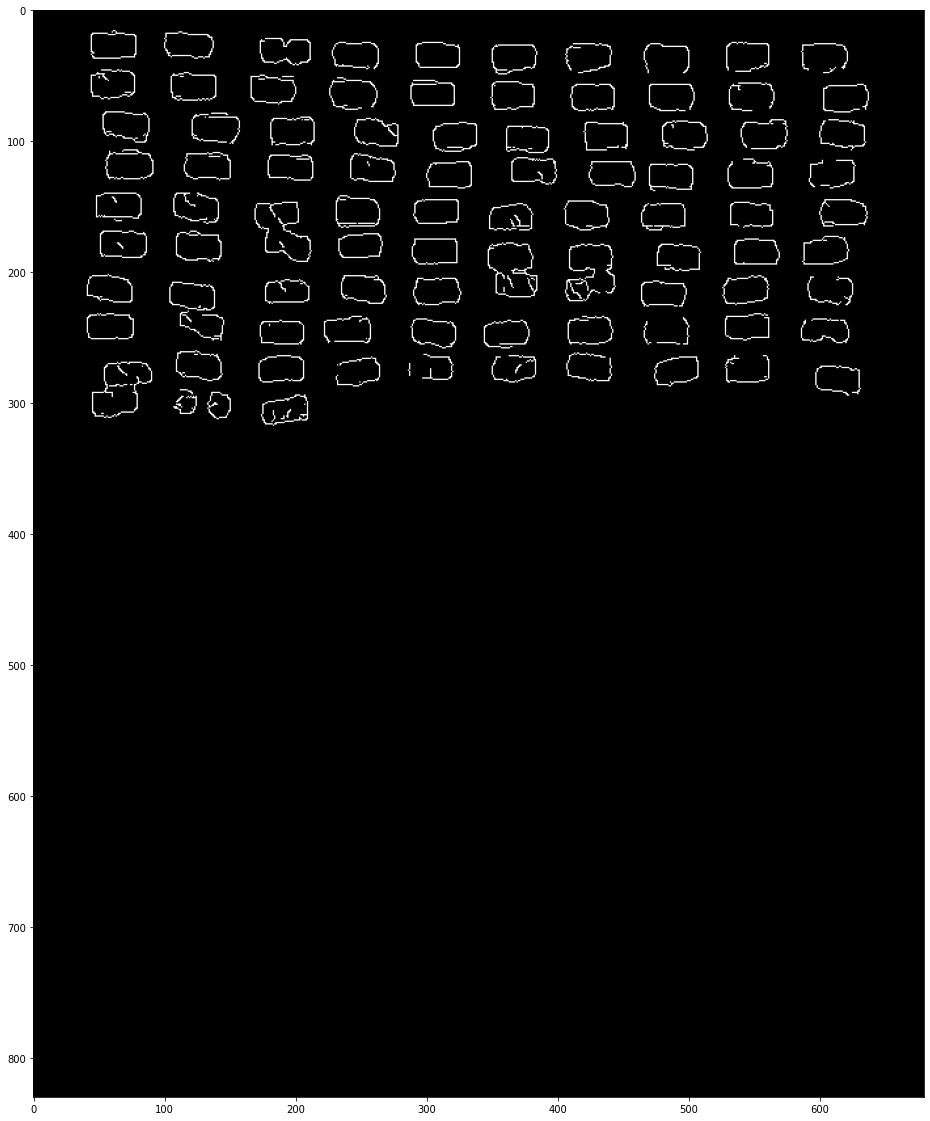

In [125]:
plt.figure(figsize = (20, 20))
plt.imshow(bil_edges, cmap = 'gray');

In [126]:
bilateral_edges = cv2.bilateralFilter(bil_edges, 9, 75, 75)
bilateral_edges = cv2.bilateralFilter(bilateral_edges, 9, 75, 75)

In [127]:
contours, hierarchy = cv2.findContours(bilateral_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)

In [128]:
def is_contours_bad(c, threshold = 200.):
    area = cv2.contourArea(c)
    if area >= threshold:
        return area

In [129]:
new_contours = [i for i in contours if is_contours_bad(i)]

In [130]:
image = cv2.drawContours(rgb_image, new_contours, -1, (0, 255, 0), 3)

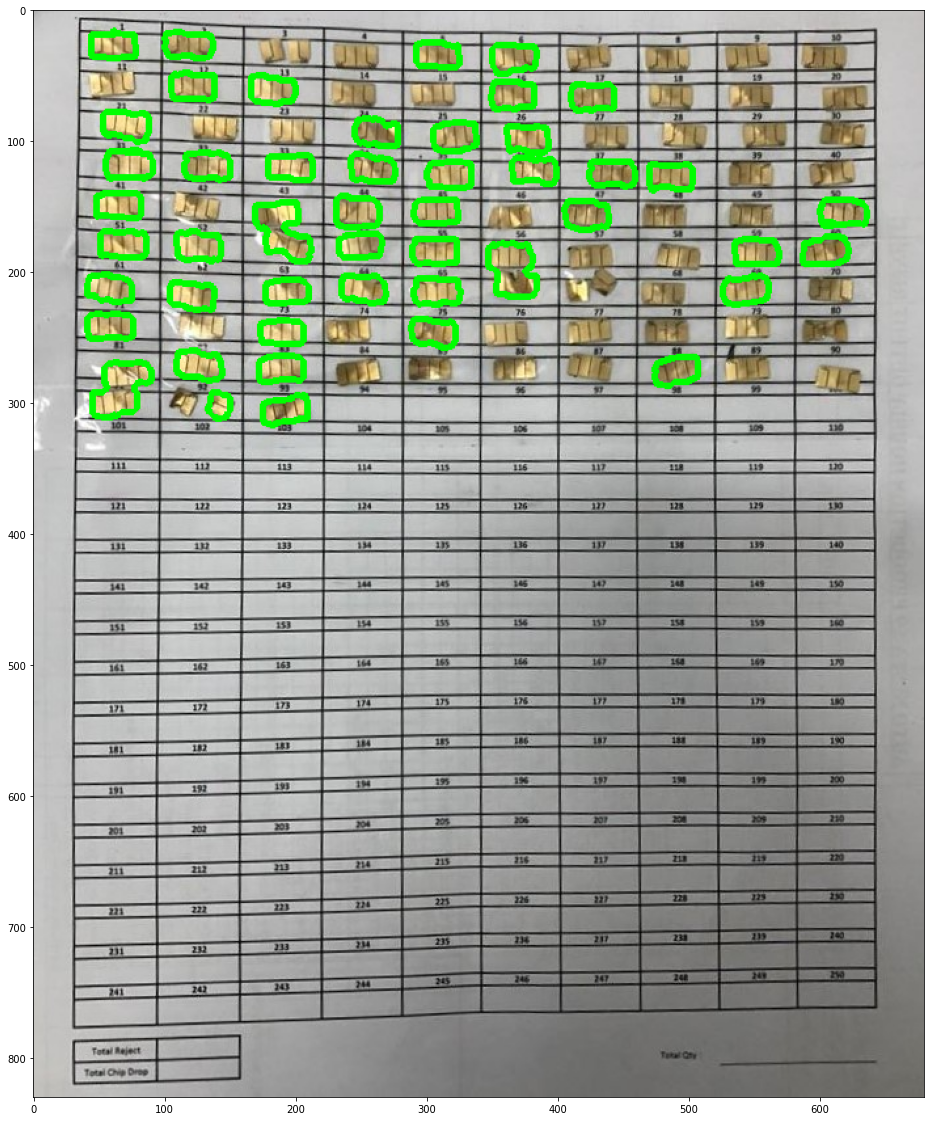

In [131]:
plt.figure(figsize = (20, 20))
plt.imshow(image);

In [132]:
for i in contours:
    print(is_contours_bad(i))

None
None
None
581.5
266.0
None
None
None
None
None
None
None
None
1254.0
584.5
None
None
None
604.0
None
None
629.0
None
None
None
None
None
543.5
None
588.0
None
None
None
None
None
None
615.5
None
595.5
None
535.0
None
620.5
None
None
624.0
595.0
581.5
None
None
1184.0
591.0
611.0
621.0
537.5
639.5
647.0
None
None
None
None
None
None
None
1172.5
633.0
611.5
571.5
693.0
None
None
597.5
None
572.0
584.5
616.5
None
None
None
568.0
577.0
592.0
636.0
662.0
None
None
559.0
None
None
635.5
None
None
None
None
574.5
None
None
None
None
None
646.0
None
None
None
588.5
None
613.0
None
None
None
None
None
609.0
606.5
None
None
None
623.5
None
None
None
None
564.5
None
None
618.5
589.5


In [133]:
len(new_contours)

48